# Introduction to Logistic Regression

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit
from sklearn.metrics import *
from scipy.stats import ttest_ind

In [4]:
data = pd.read_csv('churn.csv')

In [5]:
data.shape

(14999, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   churn                  14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,churn,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,churn,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [12]:
object_columns = data.columns[data.dtypes =='object']

In [15]:
for i in object_columns:
    print(i,'\n',data[i].value_counts(),'\n')

department 
 sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64 

salary 
 low       7316
medium    6446
high      1237
Name: salary, dtype: int64 



In [19]:
print('Duplicates:',data.duplicated().sum())

Duplicates: 3008


In [22]:
print('Missing:', data.isna().sum().sum())

Missing: 0


In [25]:
data.churn.value_counts(normalize=True)*100

0    76.191746
1    23.808254
Name: churn, dtype: float64

In [26]:
churn = pd.pivot_table(data, index = 'department',values='churn',aggfunc = 'mean')

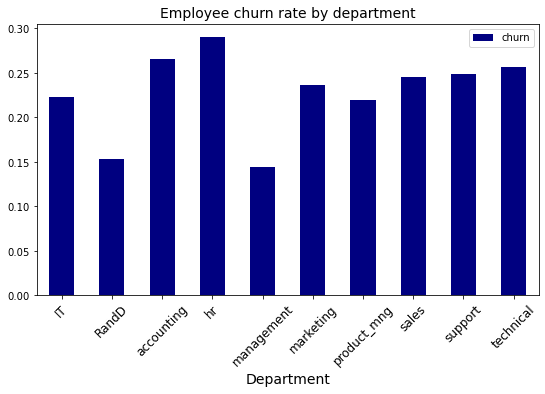

In [32]:
churn.plot.bar(color='navy',figsize=(9,5))
plt.xticks(fontsize = 12,rotation=45)
plt.xlabel('Department',fontsize = 14)
plt.title('Employee churn rate by department',fontsize = 14)
plt.show()

In [33]:
salary = pd.pivot_table(data,index ='department',columns = 'salary',values = 'churn',aggfunc = 'count')

In [34]:
salary

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


In [39]:
salary_department_rate=pd.pivot_table(data,index ='department',columns = 'salary',values = 'churn',aggfunc = 'mean')

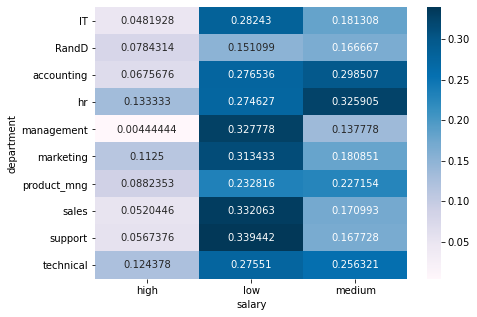

In [40]:
plt.figure(figsize = (7,5))
sns.heatmap(salary_department_rate,annot = True,cmap = 'PuBu',fmt = 'g')

In [41]:
data.groupby('churn').satisfaction_level.mean()

churn
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

In [42]:
# there is a statistically significant difference between satisfaction level of those who churned and did not churn
ttest_ind(data.satisfaction_level[data.churn==1],data.satisfaction_level[data.churn==0])

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

In [43]:
#creating dummies
data = pd.get_dummies(data,drop_first=True)

In [44]:
data.shape

(14999, 19)

# Modeling

In [47]:
X = data.drop('churn',axis=1)
Y=data.churn
model=sm.add_constant(X)

In [48]:
X0,X1,Y0,Y1 = train_test_split(X,Y,test_size = 0.25,random_state=42)

In [49]:
print(X0.shape)
print(X1.shape)

(11249, 18)
(3750, 18)


In [50]:
model=Logit(Y0,X0)
results=model.fit()

Optimization terminated successfully.
         Current function value: 0.429451
         Iterations 7


In [51]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                11249
Model:                          Logit   Df Residuals:                    11231
Method:                           MLE   Df Model:                           17
Date:                Sat, 26 Sep 2020   Pseudo R-squ.:                  0.2169
Time:                        13:43:02   Log-Likelihood:                -4830.9
converged:                       True   LL-Null:                       -6169.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
satisfaction_level        -4.4015      0.110    -40.007      0.000      -4.617      -4.186
last_evaluation            0.3712      0.167      2.221      0.026       0.044       0.699
number_project            -0.3120      0.024    -12.840      0.000      -0.360      -0.264
average_montly_hours       0.0035      0.001      6.071      0.000       0.002       0.005
time_spend_company         0.2299      0.017     13.152      0.000       0.196       0.264
work_accident             -1.5109      0.102    -14.748      0.000      -1.712      -1.310
promotion_last_5years     -1.3790      0.288     -4.784      0.000      -1.944      -0.814
department_RandD          -0.8846      0.154     -5.753      0.000      -1.186      -0.583
department_accounting     -0.1961      0.133     -1.479      0.139      -0.456       0.064
department_hr              0.0928      0.133      0.696      0.486      -0.168       0.354
department_management     -0.6438      0.163     -3.961      0.000      -0.962      -0.325
department_marketing      -0.1197      0.133     -0.903      0.367      -0.380       0.140
department_product_mng    -0.2398      0.128     -1.880      0.060      -0.490       0.010
department_sales          -0.1689      0.092     -1.843      0.065      -0.348       0.011
department_support        -0.1258      0.102     -1.228      0.220      -0.327       0.075
department_technical      -0.0734      0.097     -0.753      0.451      -0.264       0.118
salary_low                 1.2845      0.101     12.707      0.000       1.086       1.483
salary_medium              0.7979      0.103      7.747      0.000       0.596       1.000
==========================================================================================
"""

- For a one-unit increase in satisfaction_level we expect a 4.4015 decrease in the log-odds of churn, holding all other independent variables constant.
- For employees with low salaries, we expect  a 1.2845 increase in the log-odds of the dependent variable churn compared to the employees with high salaries.

In [52]:
results.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                  churn
Method:                          dydx
At:                           overall
==========================================================================================
                            dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
satisfaction_level        -0.6077      0.011    -55.771      0.000      -0.629      -0.586
last_evaluation            0.0513      0.023      2.222      0.026       0.006       0.096
number_project            -0.0431      0.003    -13.107      0.000      -0.050      -0.037
average_montly_hours       0.0005    7.9e-05      6.105      0.000       0.000       0.001
time_spend_company         0.0317      0.002     13.476      0.000       0.027       0.036
work_accident             -0.2086      0.014    -15.150      0.000      -0.236      -0.182
promotion_last_5years     -0.1904      0.040     -4.796      0.000      -0.268      -0.113
department_RandD          -0.1221      0.021     -5.779      0.000      -0.164      -0.081
department_accounting     -0.0271      0.018     -1.480      0.139      -0.063       0.009
department_hr              0.0128      0.018      0.696      0.486      -0.023       0.049
department_management     -0.0889      0.022     -3.970      0.000      -0.133      -0.045
department_marketing      -0.0165      0.018     -0.903      0.367      -0.052       0.019
department_product_mng    -0.0331      0.018     -1.882      0.060      -0.068       0.001
department_sales          -0.0233      0.013     -1.844      0.065      -0.048       0.001
department_support        -0.0174      0.014     -1.228      0.219      -0.045       0.010
department_technical      -0.0101      0.013     -0.753      0.451      -0.036       0.016
salary_low                 0.1773      0.014     12.985      0.000       0.151       0.204
salary_medium              0.1102      0.014      7.804      0.000       0.082       0.138
==========================================================================================
"""

- An Incremental increase in satisfaction level will decrease the probability of churn on average by 60.77% when other factors are held constant.
- Employees with low salary have on average 17.73% higher probability of churn compared to employees with high salaries.